In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.cm as cm

In [2]:
df = pd.read_csv('final_tonsil_leiden_r05.csv')

In [18]:
df['cluster'] = ['T' + str(c) for c in list(df['cell_type'])]

hue_order = ['T' + str(n) for n in range(13)]

In [19]:
hue_order

['T0',
 'T1',
 'T2',
 'T3',
 'T4',
 'T5',
 'T6',
 'T7',
 'T8',
 'T9',
 'T10',
 'T11',
 'T12']

In [20]:
cmap = cm.get_cmap('tab20') 
colors = [cmap(i) for i in range(cmap.N)]

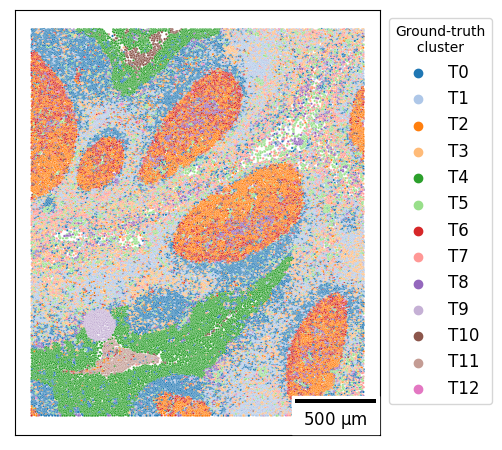

In [24]:
# figure initialization
fig,ax = plt.subplots()
fig.set_facecolor('white')

# add spatial scatterplot
sns.scatterplot(
    x=df['X_centroid'],
    y=df['Y_centroid'],
    hue=df['cluster'],
    hue_order=hue_order,
    palette=colors[0:13],
    s=3,
    ax=ax
)

# axis params
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.invert_yaxis()

# legend
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1,1), fontsize=12, title='Ground-truth\n     cluster')

# scalebar
scalebar = ScaleBar(
    0.65, 
    units='um', 
    length_fraction=0.25,
    location='lower right',
    font_properties={'size' : 12})

ax.add_artist(scalebar)
plt.tight_layout()
plt.savefig('final_tonsil_spatialscatter.png', dpi=500)

## CRC

In [2]:
df1 = pd.read_csv('crc_wsi_leiden_log1p_r05.csv')
df2 = pd.read_csv('WD-76845-002.csv')

In [3]:
df1 = df1[['cell_type','X_centroid','Y_centroid']]
df2 = df2[['X','Y','Xt','Yt']]

df1.columns = ['cell_type','X','Y']
df1 = df1.merge(df2, on = ['X','Y'])

In [4]:
# get the cmap that scanpy uses
cmap = cm.get_cmap('tab20') 
colors = [cmap(i) for i in range(cmap.N)]

# scanpy omits grey
colors.pop(14)
colors.pop(14)

# subset to len categories
colors = colors[0:17]

In [5]:
# reorder to match scanpy's color ordering
even_colors = [c for i,c in enumerate(colors) if i%2 == 0]
odd_colors = [c for i,c in enumerate(colors) if i%2 != 0]
colors = even_colors + odd_colors

In [6]:
df1['cluster'] = ['C' + str(c) for c in list(df1['cell_type'])]

hue_order = ['C' + str(n) for n in range(17)]

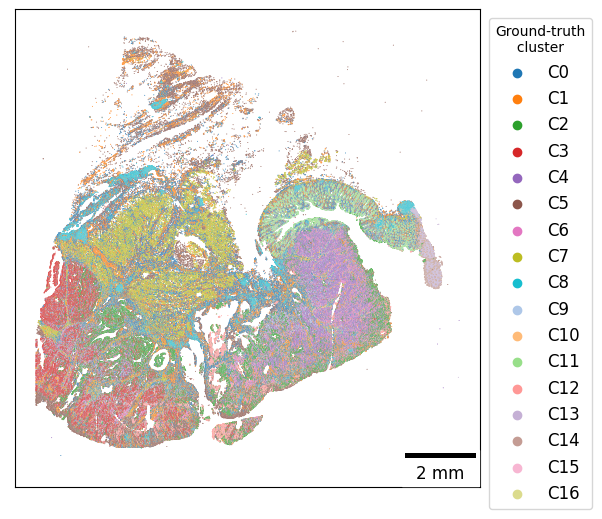

In [16]:
fig,ax = plt.subplots(figsize=(6,6))
fig.set_facecolor('white')

sns.scatterplot(
    x=df1['Yt'], 
    y=df1['Xt'], 
    hue=df1['cluster'],
    hue_order=hue_order,
    palette=colors,
    s=0.5, 
    ax = ax)

# axis params
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.invert_yaxis()
ax.invert_xaxis()

# legend
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1,1), fontsize=12, title='Ground-truth\n     cluster')

# scalebar
scalebar = ScaleBar(
    0.65, 
    units='um', 
    length_fraction=0.25,
    location='lower right',
    font_properties={'size' : 12})

ax.add_artist(scalebar)
plt.tight_layout()
plt.savefig('final_crc_spatialscatter.png', dpi=500)